In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import timedelta
import scipy.stats as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import handcalcs.render
from math import sqrt, log
import matplotlib.pylab as pylab

In [25]:
df = pd.read_parquet("yellow_tripdata_2021-06.parquet")

In [26]:
zone = pd.read_csv('zone.csv').drop(['Unnamed: 0'],axis=1)

In [27]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [28]:
temp_df = zone.copy()
temp_df.rename(columns = {'LocationID':"PULocationID"},inplace=True )
df = df.merge(temp_df,on='PULocationID')
df.rename(columns = {'latitude':"PUlatitude", 'longitude':"PUlongitude"},inplace=True )
temp_df2 = zone.copy()
temp_df2.rename(columns = {'LocationID':"DOLocationID"},inplace=True )
df = df.merge(temp_df2,on='DOLocationID')
df.rename(columns = {'latitude':"DOlatitude", 'longitude':"DOlongitude"},inplace=True )

In [29]:
df.rename(columns = {'Borough_x':"PUBorough",'Zone_x':"PUZone",'service_zone_x':"PUservice_zone",'Borough_y':"DOBorough",'Zone_y':"DOZone",'service_zone_y':"DOservice_zone"},inplace=True )

In [30]:
df['year']  = [x.year for x in df['tpep_pickup_datetime']]
df['count'] = 1
df = df[(df['tpep_pickup_datetime'] < '2022-08-31 23:59:59') | (df['tpep_pickup_datetime'] > '2021-06-01 00:00:01')]
df['day']  = [x.day for x in df['tpep_pickup_datetime']]
df['Hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
df['time_taken'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['time_taken'] = [timedelta.Timedelta(x).total.seconds for x in df['time_taken']]
df['time_taken'] = round((df['time_taken']/60),2)
df['speed(miles/hours)'] =round((df['trip_distance'])/(df['time_taken']/60),2)

In [31]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'PUBorough',
       'PUZone', 'PUservice_zone', 'PUlatitude', 'PUlongitude', 'DOBorough',
       'DOZone', 'DOservice_zone', 'DOlatitude', 'DOlongitude', 'year',
       'count', 'day', 'Hour', 'time_taken', 'speed(miles/hours)'],
      dtype='object')

In [32]:
df = df[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance' , 'time_taken', 'speed(miles/hours)','RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'PUBorough',
       'PUZone', 'PUservice_zone', 'PUlatitude', 'PUlongitude', 'DOBorough',
       'DOZone', 'DOservice_zone', 'DOlatitude', 'DOlongitude', 'year',
       'count', 'day', 'Hour']]

In [33]:
df.dropna(inplace=True)

### Total number of Passenger

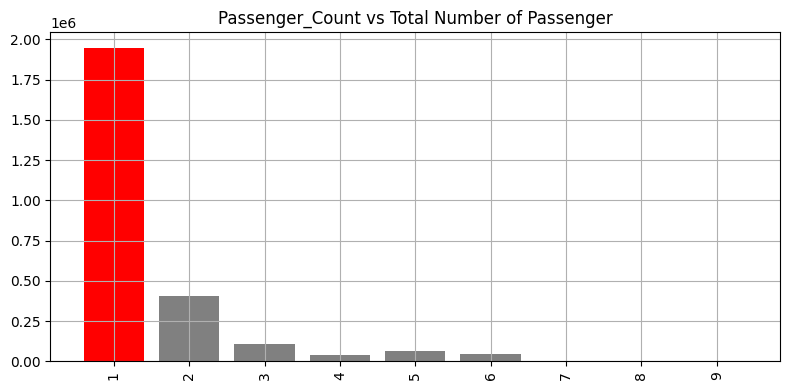

In [34]:
plt.figure(figsize=(8,4))
keys = df[df['passenger_count']>0]['passenger_count'].value_counts(ascending=False)
colors = ['gray' if d != max(keys) else 'r' for d in keys]
plt.bar(keys.index, df[df['passenger_count']>0]['passenger_count'].value_counts(ascending=False),color=colors)
plt.xticks(keys.index,rotation = 90 )
plt.grid()
plt.title('Passenger_Count vs Total Number of Passenger')
plt.tight_layout();

### Trip distance

3.63


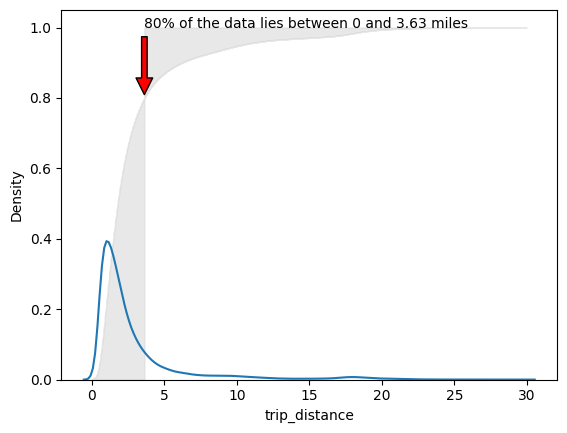

In [35]:
x = df[(df['trip_distance']<30) & (df['trip_distance']>0)]['trip_distance']

# Create a KDE plot
sns.kdeplot(x)

# Compute the CDF of the data
x_cdf = np.sort(x)
y_cdf = np.linspace(1/len(x), 1, len(x))

# Find the x-coordinate at which 80% of the data falls to the left
x80 = x_cdf[np.searchsorted(y_cdf, 0.8)]
print(x80)

# Fill the area between the line and the x-axis
plt.fill_betweenx(y_cdf, x_cdf, x80, color='lightgray', alpha=0.5)
plt.annotate('80% of the data lies between 0 and {} miles'.format(x80), xy=(x80, 0.8), xytext=(x80, 1), arrowprops=dict(facecolor='red', shrink=0.05))


plt.show()



#### As we can see that 80% data lies between 0 to 3.63 miles

### Payment type

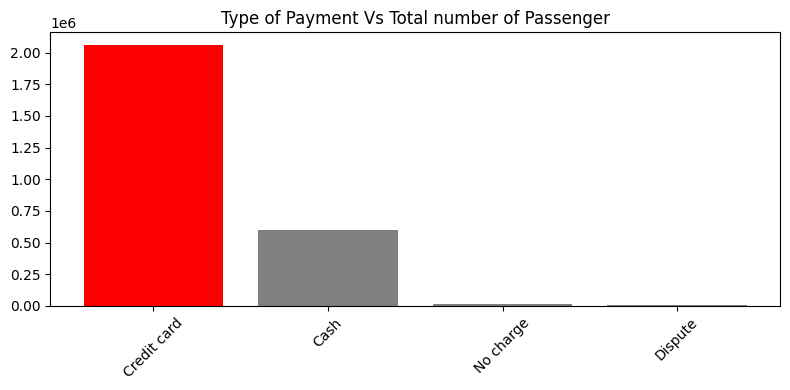

In [36]:
plt.figure(figsize=(8,4))
keys = df[df['payment_type']>0]['payment_type'].value_counts(ascending=False)
colors = ['gray' if d != max(keys) else 'r' for d in keys]
plt.bar(keys.index, df[df['payment_type']>0]['payment_type'].value_counts(ascending=False),color=colors)
plt.xticks(keys.index, ['Credit card', 'Cash', 'No charge','Dispute' ], rotation = 45)
plt.title("Type of Payment Vs Total number of Passenger")
plt.tight_layout()
plt.show()

### Total Amount

22.3


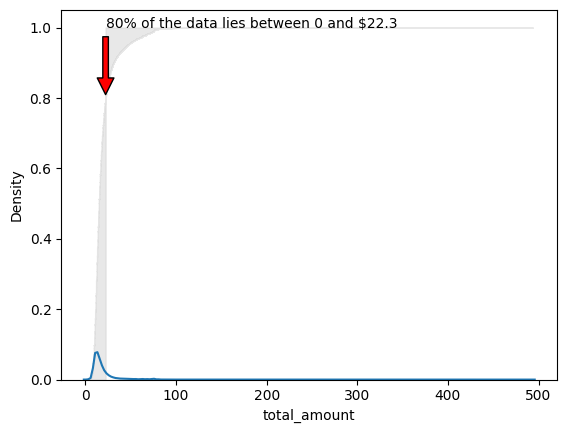

In [37]:
x = df[(df['total_amount']<500) & (df['total_amount']>0)]['total_amount']

# Create a KDE plot
sns.kdeplot(x)

# Compute the CDF of the data
x_cdf = np.sort(x)
y_cdf = np.linspace(1/len(x), 1, len(x))

# Find the x-coordinate at which 80% of the data falls to the left
x80 = x_cdf[np.searchsorted(y_cdf, 0.8)]
print(x80)

# Fill the area between the line and the x-axis
plt.fill_betweenx(y_cdf, x_cdf, x80, color='lightgray', alpha=0.5)
plt.annotate('80% of the data lies between 0 and ${}'.format(x80), xy=(x80, 0.8), xytext=(x80, 1), arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()
# sns.kdeplot(df[(df['total_amount']<500) & (df['total_amount']>0)]['total_amount'])
# plt.show()

### Time Taken

19.13


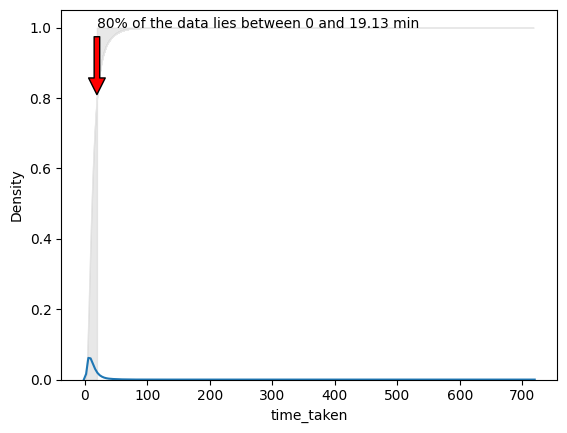

In [38]:
x = df[(df['time_taken']>0) & (df['time_taken']<720)]['time_taken']
# Create a KDE plot
sns.kdeplot(x)

# Compute the CDF of the data
x_cdf = np.sort(x)
y_cdf = np.linspace(1/len(x), 1, len(x))

# Find the x-coordinate at which 80% of the data falls to the left
x80 = x_cdf[np.searchsorted(y_cdf, 0.8)]
print(x80)

# Fill the area between the line and the x-axis
plt.fill_betweenx(y_cdf, x_cdf, x80, color='lightgray', alpha=0.5)
plt.annotate('80% of the data lies between 0 and {} min'.format(x80), xy=(x80, 0.8), xytext=(x80, 1), arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

### Speed

14.83


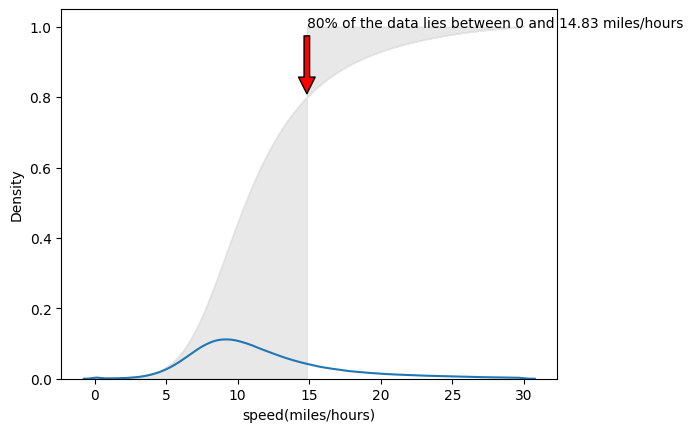

In [39]:
import seaborn as sns
x = df[(df['speed(miles/hours)']>0)&(df['speed(miles/hours)']<30)]['speed(miles/hours)']
# Create a KDE plot
sns.kdeplot(x)

# Compute the CDF of the data
x_cdf = np.sort(x)
y_cdf = np.linspace(1/len(x), 1, len(x))

# Find the x-coordinate at which 80% of the data falls to the left
x80 = x_cdf[np.searchsorted(y_cdf, 0.8)]
print(x80)

# Fill the area between the line and the x-axis
plt.fill_betweenx(y_cdf, x_cdf, x80, color='lightgray', alpha=0.5)
plt.annotate('80% of the data lies between 0 and {} miles/hours'.format(x80), xy=(x80, 0.8), xytext=(x80, 1), arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

### Pick Up Borough/Service Zone Vs Total number of Passenger

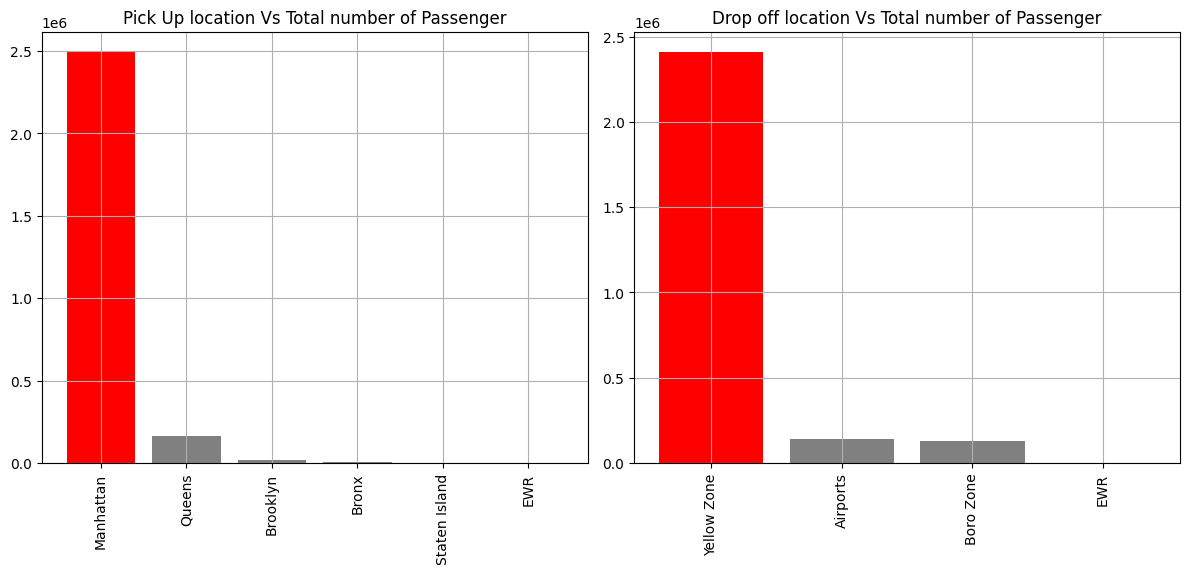

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
keys = df['PUBorough'].value_counts(ascending=False)
colors = ['gray' if d != max(keys) else 'r' for d in keys]
plt.bar(keys.index[:10], df['PUBorough'].value_counts(ascending=False)[:10],color=colors)
plt.xticks(keys.index[:10],rotation = 90 )
plt.grid()
plt.title('Pick Up location Vs Total number of Passenger')
plt.subplot(1,2,2)
keys = df['PUservice_zone'].value_counts(ascending=False)
colors = ['gray' if d != max(keys) else 'r' for d in keys]
plt.bar(keys.index[:10], df['PUservice_zone'].value_counts(ascending=False)[:10],color=colors)
plt.xticks(keys.index[:10], rotation = 90)
plt.grid()
plt.title("Drop off location Vs Total number of Passenger")
plt.tight_layout()
plt.show()


### Top 10 location for Pickup and DropOFF 

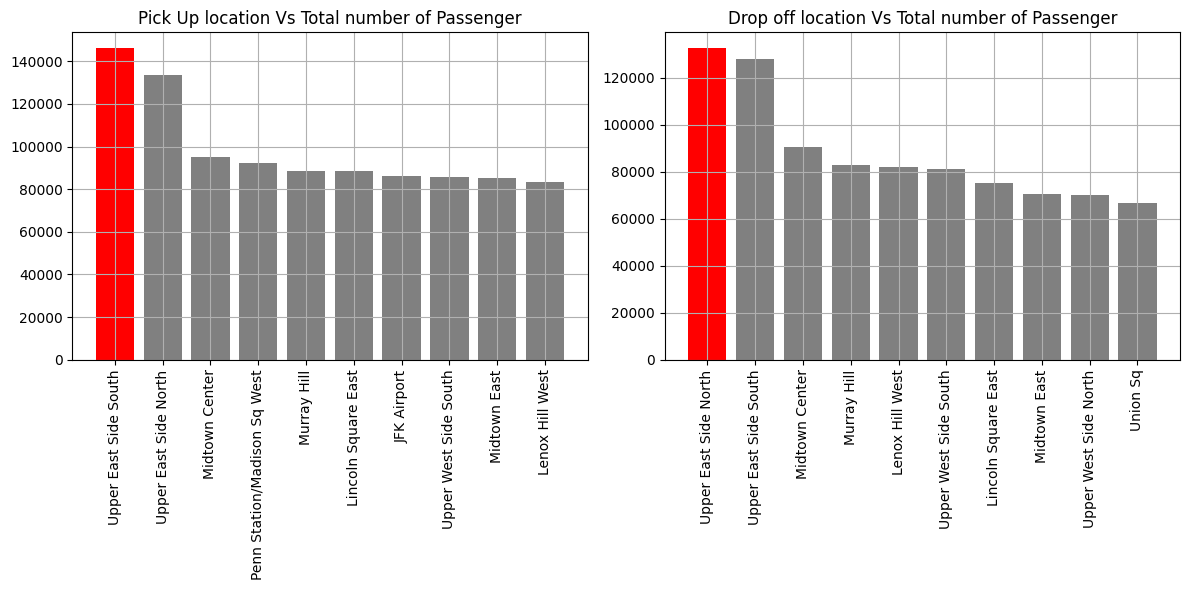

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
keys = df['PUZone'].value_counts(ascending=False)
colors = ['gray' if d != max(keys) else 'r' for d in keys]
plt.bar(keys.index[:10], df['PUZone'].value_counts(ascending=False)[:10],color=colors)
plt.xticks(keys.index[:10],rotation = 90 )
plt.grid()
plt.title('Pick Up location Vs Total number of Passenger')
plt.subplot(1,2,2)
keys = df['DOZone'].value_counts(ascending=False)
colors = ['gray' if d != max(keys) else 'r' for d in keys]
plt.bar(keys.index[:10], df['DOZone'].value_counts(ascending=False)[:10],color=colors)
plt.xticks(keys.index[:10], rotation = 90)
plt.grid()
plt.title("Drop off location Vs Total number of Passenger")
plt.tight_layout()
plt.show()

### Which location has most Revenue vs Total number of passenger

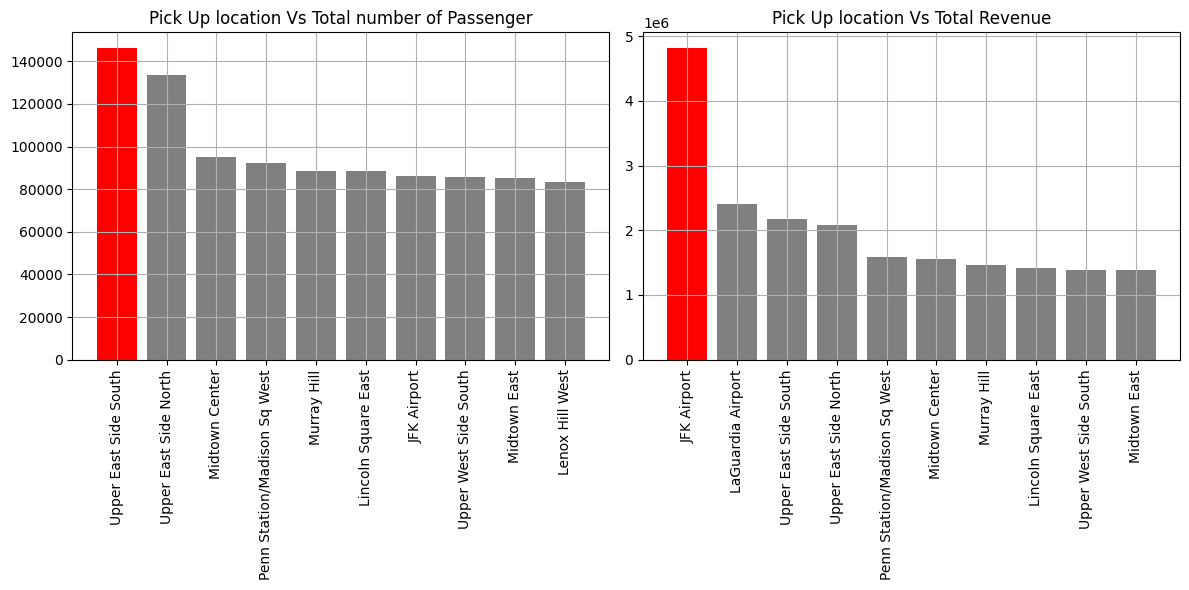

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
keys = df.groupby('PUZone').count()['count'].sort_values(ascending=False)
colors = ['gray' if d != max(keys) else 'r' for d in keys]
plt.bar(keys.index[:10], df.groupby('PUZone').count()['count'].sort_values(ascending=False)[:10],color=colors)
plt.xticks(keys.index[:10],rotation = 90 )
plt.grid()
plt.title('Pick Up location Vs Total number of Passenger')
plt.subplot(1,2,2)
keys = df.groupby('PUZone').sum()['total_amount'].sort_values(ascending=False)
colors = ['gray' if d != max(keys) else 'r' for d in keys]
plt.bar(keys.index[:10], df.groupby('PUZone').sum()['total_amount'].sort_values(ascending=False)[:10],color=colors)
plt.xticks(keys.index[:10], rotation = 90)
plt.grid()
plt.title("Pick Up location Vs Total Revenue")
plt.tight_layout()
plt.show()

### Which Time/Days has most Total number of Passenger

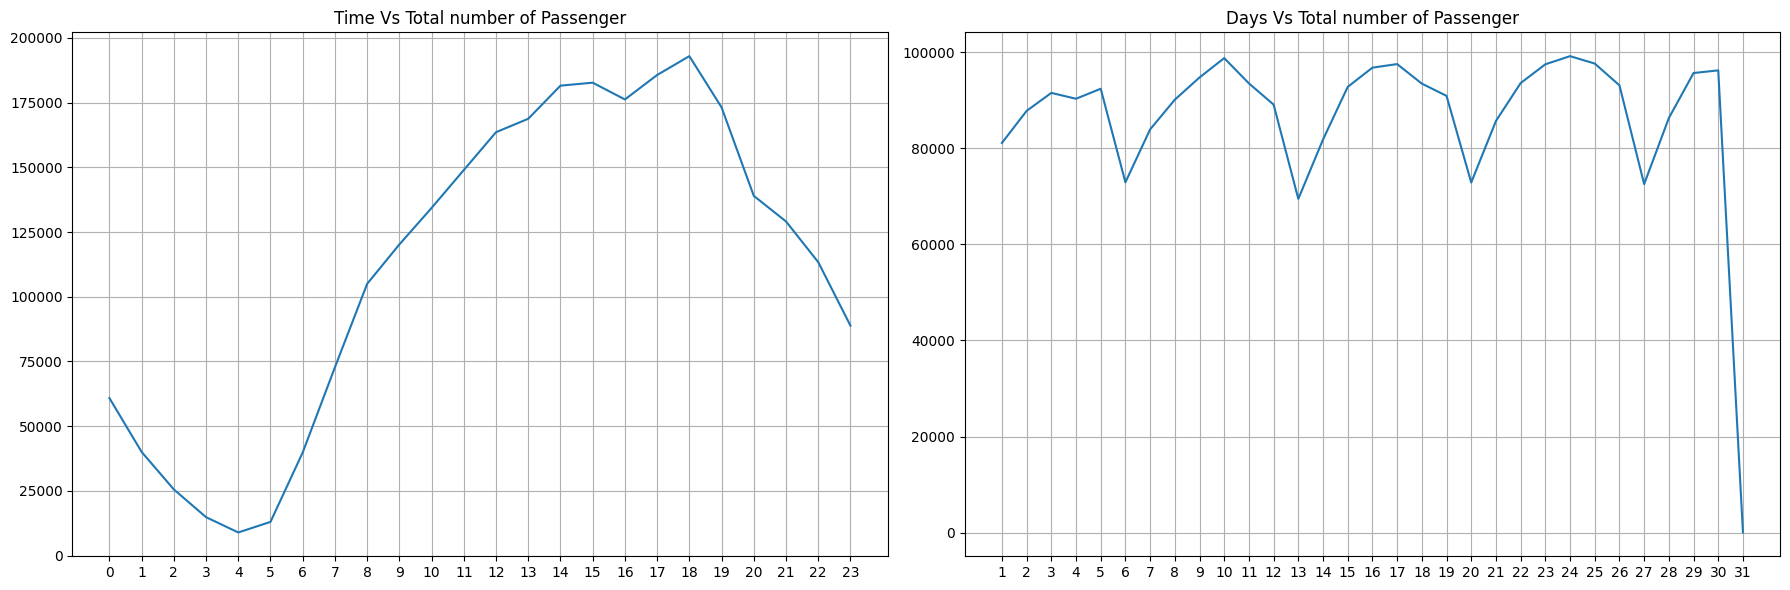

In [43]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
keys = [pair for pair, x in df.groupby(['Hour'])]
plt.plot(keys, df.groupby(['Hour']).count()['count'])
plt.xticks(keys)
plt.grid()
plt.title('Time Vs Total number of Passenger')
plt.subplot(1,2,2)
keys = [pair for pair, x in df.groupby(['day'])]
plt.plot(keys, df.groupby(['day']).count()['count'])
plt.xticks(keys)
plt.grid()
plt.title("Days Vs Total number of Passenger")
plt.tight_layout()
plt.show()

### Variance & standard deviation 
##### The variance is a measure of the spread of a set of data. It is calculated as the average of the squared differences of each data point from the mean.
##### The formula for variance of a set of n data points, x1, x2, ..., xn, is:

### $$σ² = (1/n) * ∑(xi - mean)^2$$
##### It's worth noting that variance is always non-negative and it is measured in the same unit as the data points, so it may be difficult to interpret. That's why, often the standard deviation is used instead, which is the square root of the variance and it is measured in the same unit as the data points, making it more interpretable.
##### standard deviation is calculated as the square root of variance. Variance is calculated by dividing the sum of squares of the difference of each value and the mean, with the total number of values
### $$\sigma  = \sqrt{\left(\frac{1}{n}\right)\ast \sum _{ }^{ }(x_i}-\mu )^2$$

In [113]:
counter = 0
data_name =['trip_distance','time_taken','speed(miles/hours)','total_amount']
for i in data_name:
    print("{} ---- mean trip distance is {}".format(i, df[i].mean()))
    print("{} ---- median trip distance is {}".format(i, df[i].median()))
    print("{} ---- std trip distance is {}".format(i, df[i].std()))
    print('')
    print("*"*60)
    print('')
print("") 

trip_distance ---- mean trip distance is 2.956653736349172
trip_distance ---- median trip distance is 1.78
trip_distance ---- std trip distance is 9.062618008170949

************************************************************

time_taken ---- mean trip distance is 16.43560717563571
time_taken ---- median trip distance is 10.77
time_taken ---- std trip distance is 62.836813985308474

************************************************************

speed(miles/hours) ---- mean trip distance is inf
speed(miles/hours) ---- median trip distance is 10.58
speed(miles/hours) ---- std trip distance is nan

************************************************************

total_amount ---- mean trip distance is 18.592277607061433
total_amount ---- median trip distance is 14.76
total_amount ---- std trip distance is 13.237293864266949

************************************************************




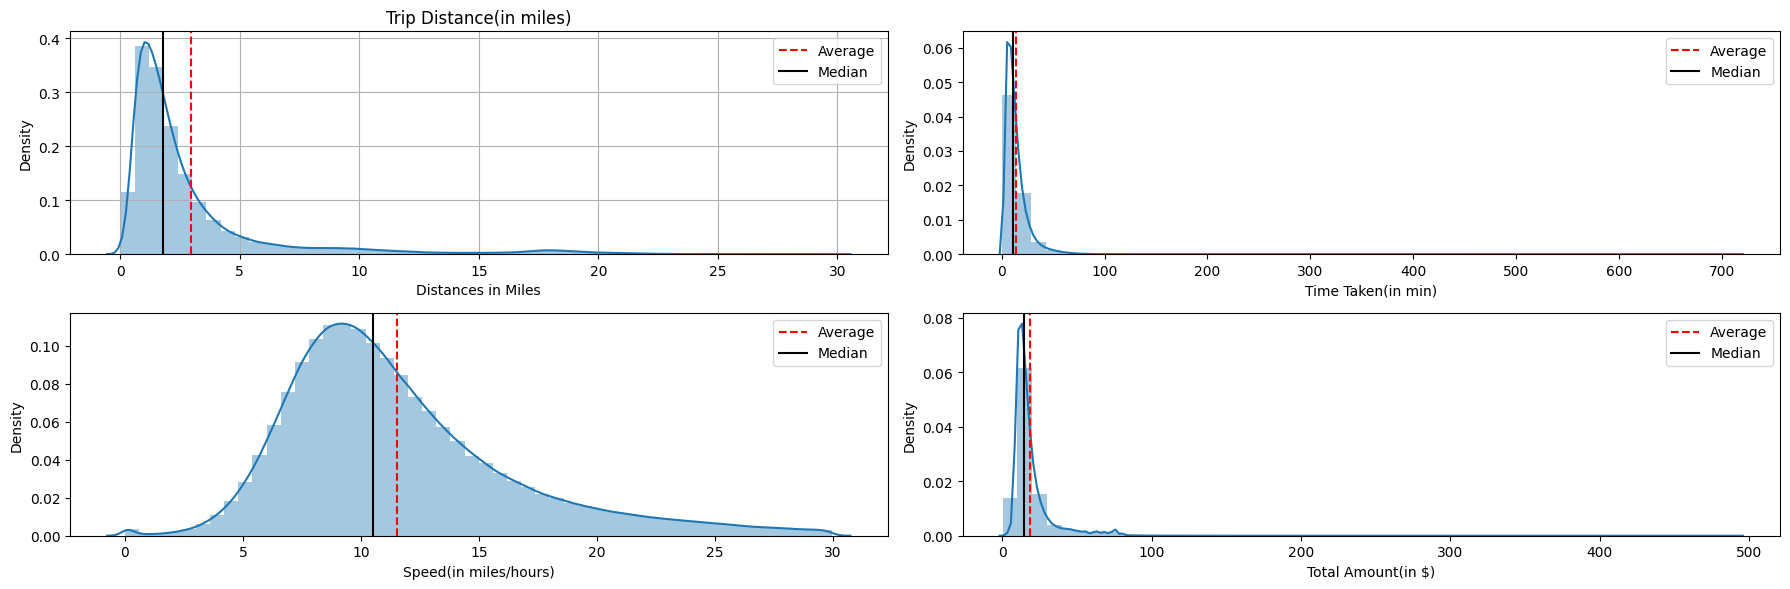

In [155]:
plt.figure(figsize=(18,6))
plt.subplot(2,2,1)
sns.distplot(df[(df['trip_distance']<30) & (df['trip_distance']>0)]['trip_distance'])
plt.axvline(df[(df['trip_distance']<30) & (df['trip_distance']>0)]['trip_distance'].mean(), color='red', linestyle='--',label='Average')
plt.axvline(df[(df['trip_distance']<30) & (df['trip_distance']>0)]['trip_distance'].median(), color='black', linestyle='-',label='Median')
plt.tight_layout() 
# plt.title("{}".format(data_name[counter-1]))
plt.xlabel('Distances in Miles')  
plt.legend()
plt.grid()
plt.title('Trip Distance(in miles)')


plt.subplot(2,2,2)
sns.distplot(df[(df['time_taken']<720) & (df['time_taken']>0)]['time_taken'])
plt.axvline(df[(df['time_taken']<720) & (df['time_taken']>0)]['time_taken'].mean(), color='red', linestyle='--',label='Average')
plt.axvline(df[(df['time_taken']<720) & (df['time_taken']>0)]['time_taken'].median(), color='black', linestyle='-',label='Median')
plt.tight_layout() 
# plt.title("{}".format(data_name[counter-1]))
plt.xlabel('Time Taken(in min)')  
plt.legend()

plt.subplot(2,2,3)
sns.distplot(df[(df['speed(miles/hours)']<30) & (df['speed(miles/hours)']>0)]['speed(miles/hours)'])
plt.axvline(df[(df['speed(miles/hours)']<30) & (df['speed(miles/hours)']>0)]['speed(miles/hours)'].mean(), color='red', linestyle='--',label='Average')
plt.axvline(df[(df['speed(miles/hours)']<30) & (df['speed(miles/hours)']>0)]['speed(miles/hours)'].median(), color='black', linestyle='-',label='Median')
plt.tight_layout() 
# plt.title("{}".format(data_name[counter-1]))
plt.xlabel('Speed(in miles/hours)') 
plt.legend()


plt.subplot(2,2,4)
sns.distplot(df[(df['total_amount']<500) & (df['total_amount']>0)]['total_amount'])
plt.axvline(df[(df['total_amount']<500) & (df['total_amount']>0)]['total_amount'].mean(), color='red', linestyle='--',label='Average')
plt.axvline(df[(df['total_amount']<500) & (df['total_amount']>0)]['total_amount'].median(), color='black', linestyle='-',label='Median')
plt.tight_layout() 
# plt.title("{}".format(data_name[counter-1]))
plt.xlabel('Total Amount(in $)')  
plt.legend()




### 95% Confidence Interval

##### - This approach is used to calculate confidence Intervals for the large dataset where the n>30, norm.interval() else smaller t.interval()
##### - The level of confidence is a probability statement about the interval. It tells you the probability that the interval contains the true population parameter. Commonly used levels of confidence are 90%, 95% and 99%. For example, a 95% confidence interval means that if you were to repeat the sampling process many times and create a confidence interval for each sample, approximately 95% of those intervals would contain the true population parameter.
### $$CI\ =\ \left(\mu \right)\pm \left(\left(Z-value\right)\ast \left(\frac{\sigma }{\sqrt{n}}\right)\right)$$

In [68]:
counter = 0
data_name =['trip_distance','time_taken','speed(miles/hours)','total_amount']
for i in data_name:
  print("") 
  print("------------ {} -------------".format(i))
  print(st.norm.interval(alpha=0.95,loc=np.mean(df[i]),scale=st.sem(df[i])))
print("") 


------------ trip_distance -------------
(2.9458020677103263, 2.967505404988018)

------------ time_taken -------------
(16.360365751681336, 16.510848599590084)

------------ speed(miles/hours) -------------
(nan, nan)

------------ total_amount -------------
(18.5764271401698, 18.60812807395307)



### Chebyshev Inequality Prbability
##### Chebbyshev Inequality Probability tells that how much of percentage data falling in range

## $$ (μ−k·σ  < X < μ−k·σ) > 1-(1/k^2) $$


In [69]:
counter = 0
k=2
print("*"*40)
print(" {}% probalbity fall under in range".format((1-(1/k**2))*100))
print("")
print("*"*40)
counter = 0
data_name =['trip_distance','time_taken','speed(miles/hours)','total_amount']
for i in data_name:
  counter = counter + 1
  print("") 
  print("------------ {} -------------".format(i))
  print("") 
  mu = df[i].mean()
  std = df[i].std()
  print(mu-k*std,"-",mu+k*std) 

****************************************
 75.0% probalbity fall under in range

****************************************

------------ trip_distance -------------

-15.168582279992727 - 21.08188975269107

------------ time_taken -------------

-109.23802079498124 - 142.10923514625267

------------ speed(miles/hours) -------------

nan - nan

------------ total_amount -------------

-7.8823101214724645 - 45.06686533559533


### Q-Q plot (Quantile - Quantile Plot)
##### if you have not mean and std then to find normal distributon or not

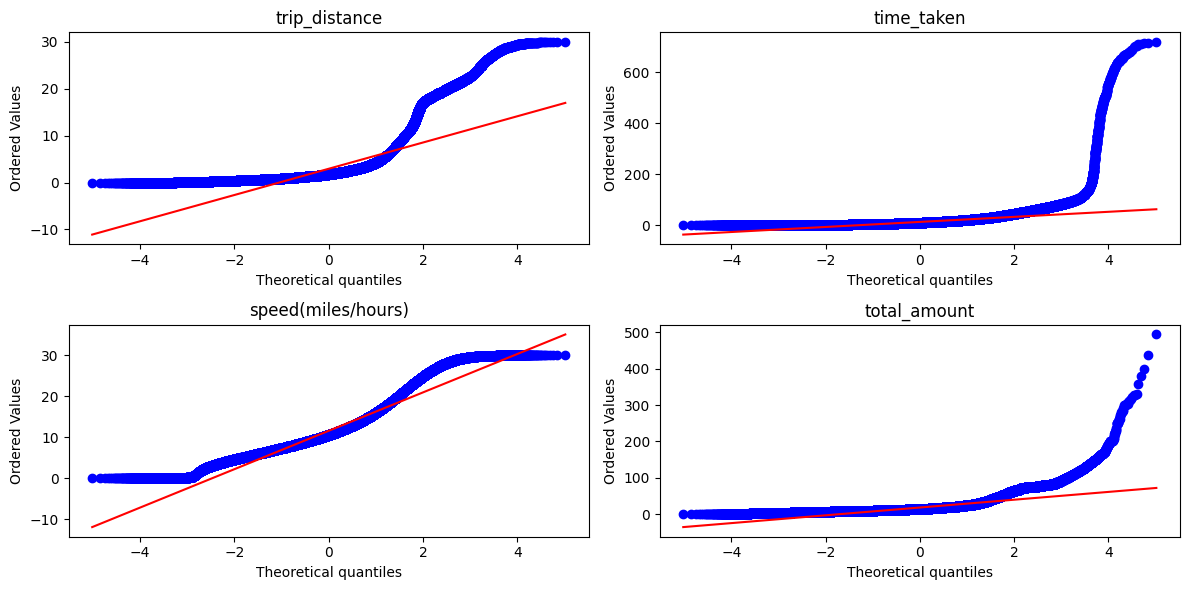

In [159]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
st.probplot(x = df[(df['trip_distance']<30) & (df['trip_distance']>0)]['trip_distance'], dist="norm", plot=pylab);
plt.title("trip_distance")
plt.subplot(2,2,2)
st.probplot(x = df[(df['time_taken']<720) & (df['time_taken']>0)]['time_taken'], dist="norm", plot=pylab)
plt.title("time_taken");
plt.subplot(2,2,3)
st.probplot(x = df[(df['speed(miles/hours)']<30) & (df['speed(miles/hours)']>0)]['speed(miles/hours)'], dist="norm", plot=pylab)
plt.title("speed(miles/hours)");
plt.subplot(2,2,4)
st.probplot(x = df[(df['total_amount']<500) & (df['total_amount']>0)]['total_amount'], dist="norm", plot=pylab)
plt.title("total_amount");
plt.tight_layout()

### Two Sample KS Test for check same distribution or not
##### we compare the KS Test with  latest dataset with previous year dataset ,  
##### st.kstest(i['trip_distance'],'norm') first is our dataset and second comapare with normal distribution
##### if p>0.05 then normal distribution else not distribution
##### The null hypothesis is rejected at $ \alpha $ if

### $$ D_{n,m}\ \ >\ c\left(\alpha \right)\sqrt{\frac{n+m}{n\cdot m}} $$

##### Check lookup table in wiki KS test (wiki)
##### The test statistic of the KS test is the maximum absolute difference between the sample CDF and the reference CDF, which is denoted by D. The null hypothesis of the test is that the sample data is drawn from the same distribution as the reference distribution. The alternative hypothesis is that the sample data is not drawn from the same distribution as the reference distribution.
![image_description](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/KS_Example.png/300px-KS_Example.png)


*************************
total_amount
KS statistic:  0.6691891423796358
p-value:  0.0
*************************
total_amount
KS statistic:  0.9645878522284635
p-value:  0.0
*************************
total_amount
KS statistic:  0.9921483599152854
p-value:  0.0
*************************
total_amount
KS statistic:  0.999314437769175
p-value:  0.0


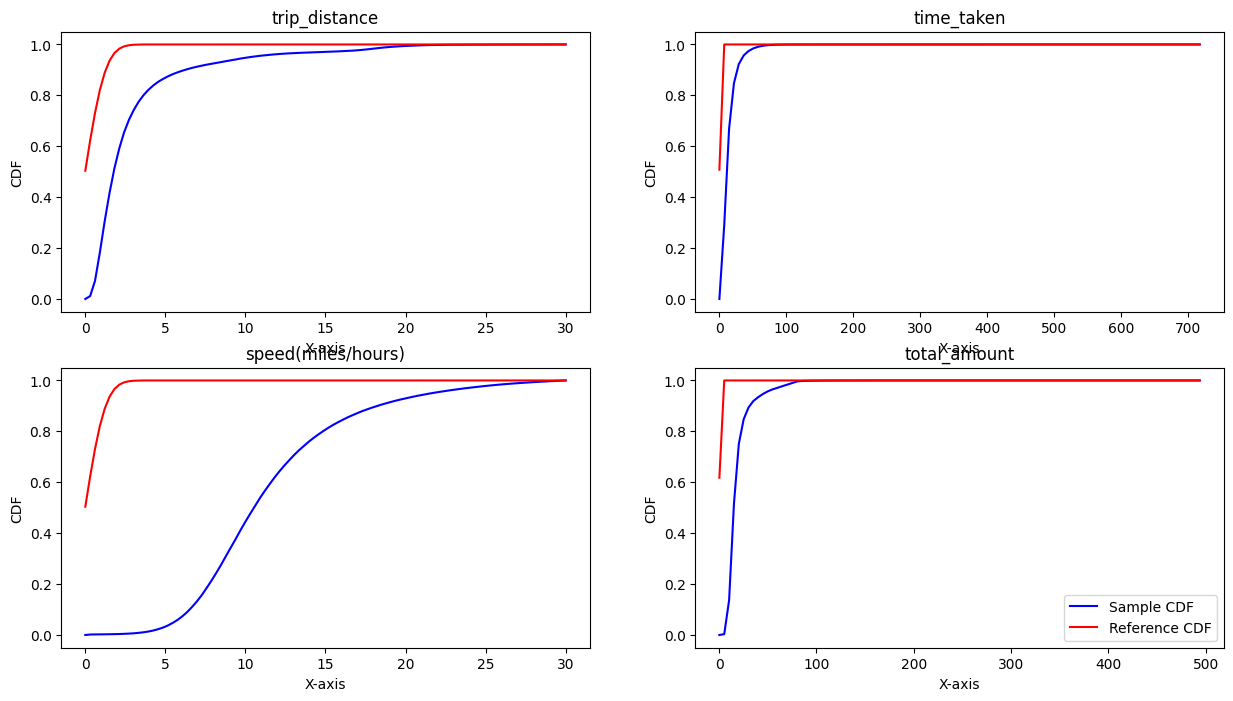

<Figure size 640x480 with 0 Axes>

In [162]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
# Generate sample data
sample_data = df[(df['trip_distance']<30) & (df['trip_distance']>0)]['trip_distance']
# Conduct KS test
statistic, p_value = stats.kstest(sample_data, 'norm')
print('*'*25)
print("total_amount")
print("KS statistic: ", statistic)
print("p-value: ", p_value)
# Generate x values for the CDF
x = np.linspace(min(sample_data), max(sample_data), 100)
# Calculate the CDF of the sample data
y_sample = np.array([stats.percentileofscore(sample_data, i, 'rank') for i in x])/100
# Calculate the CDF of the reference distribution
y_reference = stats.norm.cdf(x)
# Plot the CDF of the sample data and the reference distribution
plt.plot(x, y_sample, 'b', label='Sample CDF')
plt.plot(x, y_reference, 'r', label='Reference CDF')
plt.xlabel('X-axis')
plt.ylabel('CDF')
plt.title('trip_distance')
plt.legend()

plt.subplot(2,2,2)
# Generate sample data
sample_data = df[(df['time_taken']<720) & (df['time_taken']>0)]['time_taken']
# Conduct KS test
statistic, p_value = stats.kstest(sample_data, 'norm')
print('*'*25)
print("total_amount")
print("KS statistic: ", statistic)
print("p-value: ", p_value)
# Generate x values for the CDF
x = np.linspace(min(sample_data), max(sample_data), 100)
# Calculate the CDF of the sample data
y_sample = np.array([stats.percentileofscore(sample_data, i, 'rank') for i in x])/100
# Calculate the CDF of the reference distribution
y_reference = stats.norm.cdf(x)
# Plot the CDF of the sample data and the reference distribution
plt.plot(x, y_sample, 'b', label='Sample CDF')
plt.plot(x, y_reference, 'r', label='Reference CDF')
plt.xlabel('X-axis')
plt.ylabel('CDF')
plt.title('time_taken')
plt.legend()

plt.subplot(2,2,3)
# Generate sample data
sample_data = df[(df['speed(miles/hours)']<30) & (df['speed(miles/hours)']>0)]['speed(miles/hours)']
# Conduct KS test
statistic, p_value = stats.kstest(sample_data, 'norm')
print('*'*25)
print("total_amount")
print("KS statistic: ", statistic)
print("p-value: ", p_value)
# Generate x values for the CDF
x = np.linspace(min(sample_data), max(sample_data), 100)
# Calculate the CDF of the sample data
y_sample = np.array([stats.percentileofscore(sample_data, i, 'rank') for i in x])/100
# Calculate the CDF of the reference distribution
y_reference = stats.norm.cdf(x)
# Plot the CDF of the sample data and the reference distribution
plt.plot(x, y_sample, 'b', label='Sample CDF')
plt.plot(x, y_reference, 'r', label='Reference CDF')
plt.xlabel('X-axis')
plt.ylabel('CDF')
plt.title('speed(miles/hours)')
plt.legend()

plt.subplot(2,2,4)
# Generate sample data
sample_data = df[(df['total_amount']<500) & (df['total_amount']>0)]['total_amount']
# Conduct KS test
statistic, p_value = stats.kstest(sample_data, 'norm')
print('*'*25)
print("total_amount")
print("KS statistic: ", statistic)
print("p-value: ", p_value)
# Generate x values for the CDF
x = np.linspace(min(sample_data), max(sample_data), 100)
# Calculate the CDF of the sample data
y_sample = np.array([stats.percentileofscore(sample_data, i, 'rank') for i in x])/100
# Calculate the CDF of the reference distribution
y_reference = stats.norm.cdf(x)
# Plot the CDF of the sample data and the reference distribution
plt.plot(x, y_sample, 'b', label='Sample CDF')
plt.plot(x, y_reference, 'r', label='Reference CDF')
plt.xlabel('X-axis')
plt.ylabel('CDF')
plt.title('total_amount')
plt.legend()
plt.show()
plt.tight_layout()

### Power Law Distribution (80-20 rule)
##### A real-world example of a power-law distribution is the distribution of city population sizes. According to Zipf's law, the frequency of a city's population is inversely proportional to its rank in a list of cities by population. This means that the second-largest city is half as populous as the largest city, the third-largest city is a third as populous, and so on. In other words, the population of a city is inversely proportional to its rank, which is a power-law relationship.
##### The most common example of a power-law distribution is the Pareto distribution, which is characterized by a probability density function (PDF) of the form:

### $$f(x) = kx^{\left(-\alpha \right)}$$
##### Where x is the variable, k is a normalization constant, and alpha is the power-law exponent. The power-law exponent determines the shape of the distribution, with a larger exponent resulting in a flatter distribution and a smaller exponent resulting in a steeper distribution.


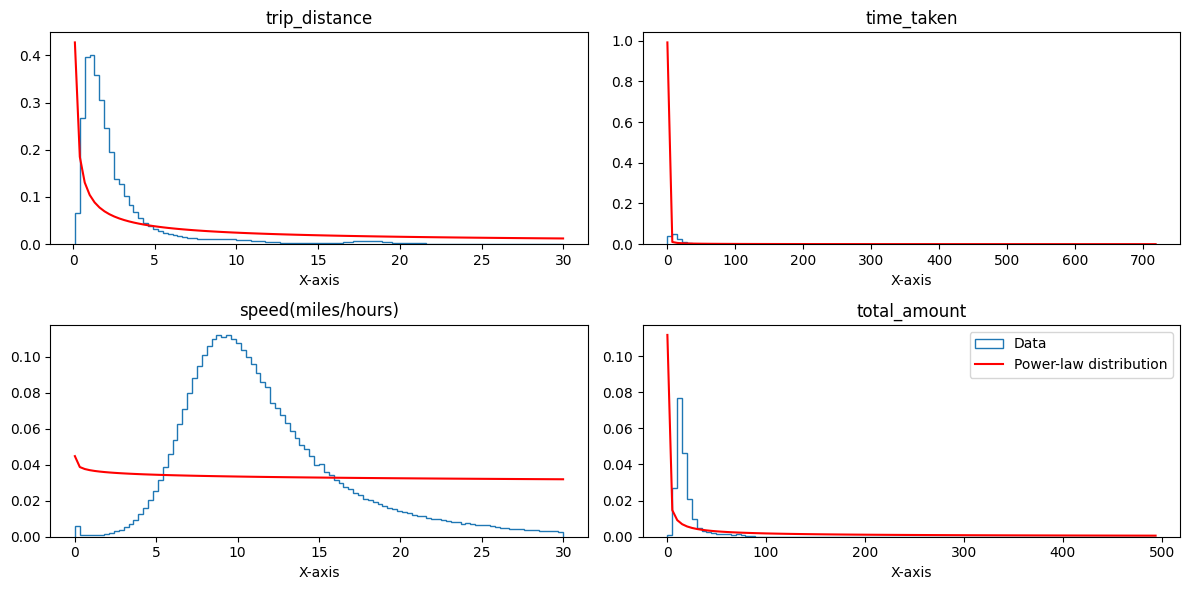

In [167]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
# import dataset
data = df[(df['trip_distance']<30) & (df['trip_distance']>0.1)]['trip_distance']
# Fit the data to a power-law distribution
alpha, loc, scale = powerlaw.fit(data, floc=0)
# Plot the data
plt.hist(data, bins=100, density=True, histtype='step', label='Data')
# Plot the fitted power-law distribution
x = np.linspace(min(data), max(data), 100)
y = powerlaw.pdf(x, alpha, loc, scale)
plt.plot(x, y, 'r', label='Power-law distribution')
plt.xlabel('X-axis')
plt.title('trip_distance')
plt.legend()

plt.subplot(2,2,2)
# import dataset
data =df[(df['time_taken']<720) & (df['time_taken']>0)]['time_taken']
# Fit the data to a power-law distribution
alpha, loc, scale = powerlaw.fit(data, floc=0)
# Plot the data
plt.hist(data, bins=100, density=True, histtype='step', label='Data')
# Plot the fitted power-law distribution
x = np.linspace(min(data), max(data), 100)
y = powerlaw.pdf(x, alpha, loc, scale)
plt.plot(x, y, 'r', label='Power-law distribution')
plt.xlabel('X-axis')
plt.title('time_taken')
plt.legend()

plt.subplot(2,2,3)
# import dataset
data = df[(df['speed(miles/hours)']<30) & (df['speed(miles/hours)']>0)]['speed(miles/hours)']
# Fit the data to a power-law distribution
alpha, loc, scale = powerlaw.fit(data, floc=0)
# Plot the data
plt.hist(data, bins=100, density=True, histtype='step', label='Data')
# Plot the fitted power-law distribution
x = np.linspace(min(data), max(data), 100)
y = powerlaw.pdf(x, alpha, loc, scale)
plt.plot(x, y, 'r', label='Power-law distribution')
plt.xlabel('X-axis')
plt.title('speed(miles/hours)')
plt.legend()

plt.subplot(2,2,4)
# import dataset
data = df[(df['total_amount']<500) & (df['total_amount']>0)]['total_amount']
# Fit the data to a power-law distribution
alpha, loc, scale = powerlaw.fit(data, floc=0)
# Plot the data
plt.hist(data, bins=100, density=True, histtype='step', label='Data')
# Plot the fitted power-law distribution
x = np.linspace(min(data), max(data), 100)
y = powerlaw.pdf(x, alpha, loc, scale)
plt.plot(x, y, 'r', label='Power-law distribution')
plt.xlabel('X-axis')
plt.title('total_amount')
plt.tight_layout()
plt.legend()
plt.show()


### Central Limit Theorem
###### 1. Sampling Distribution Mean(μₓ¯) = Population Mean(μ)
###### 2. Sampling distribution’s standard deviation (Standard error) = σ/√n ≈S/√n
###### 3. For n > 30, the sampling distribution becomes a normal distribution

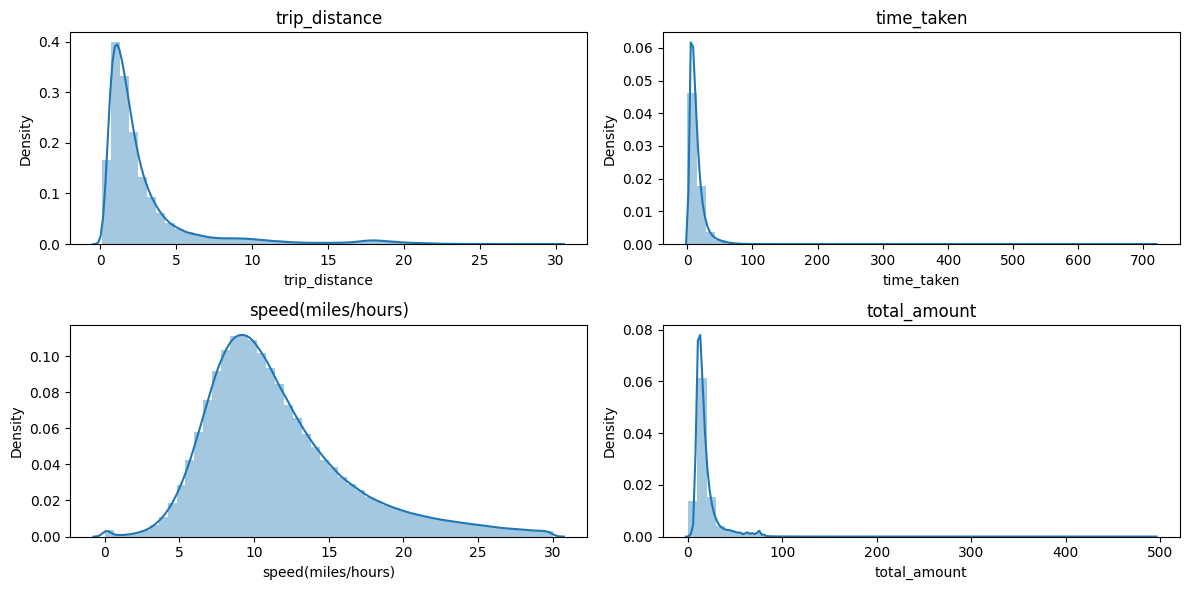

In [168]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.distplot(df[(df['trip_distance']<30) & (df['trip_distance']>0.1)]['trip_distance'])
plt.title('trip_distance')
plt.subplot(2,2,2)
sns.distplot(df[(df['time_taken']<720) & (df['time_taken']>0)]['time_taken'])
plt.title('time_taken')
plt.subplot(2,2,3)
sns.distplot(df[(df['speed(miles/hours)']<30) & (df['speed(miles/hours)']>0)]['speed(miles/hours)'])
plt.title('speed(miles/hours)')
plt.subplot(2,2,4)
sns.distplot(df[(df['total_amount']<500) & (df['total_amount']>0)]['total_amount'])
plt.title('total_amount')
plt.tight_layout()
plt.show()

##### As we can see that data is not normal distribution and lookalike exponantial distribution.

In [166]:
sample_means = [df[(df['trip_distance']<30) & (df['trip_distance']>0.1)]['trip_distance'].sample(30).mean() for i in range(1000) ]
sample_means = pd.Series(sample_means)
print("")
print("*"*25)
print('trip_distance')
print("*"*25)
### original mean
print("Original mean {}".format(df[(df['trip_distance']<30) & (df['trip_distance']>0.1)]['trip_distance'].mean()))
### sampling means
print("Sampling mean {}".format(sample_means.mean()))
print("")
print("---"*25)
print("")
### original std deviation
print("Sampling standard deviation {}".format(sample_means.std()))
### sampling std deviation (σ/√n)
print("Sampling distribution’s standard deviation (standard error) σ/√n =  {}".format(sample_means.std()/np.sqrt(30)))

sample_means = [df[(df['time_taken']<720) & (df['time_taken']>0)]['time_taken'].sample(30).mean() for i in range(1000) ]
sample_means = pd.Series(sample_means)
print("")
print("*"*25)
print('time_taken')
print("*"*25)
### original mean
print("Original mean {}".format(df[(df['time_taken']<720) & (df['time_taken']>0)]['time_taken'].mean()))
### sampling means
print("Sampling mean {}".format(sample_means.mean()))
print("")
print("---"*25)
print("")
### original std deviation
print("Sampling standard deviation {}".format(sample_means.std()))
### sampling std deviation (σ/√n)
print("Sampling distribution’s standard deviation (standard error) σ/√n =  {}".format(sample_means.std()/np.sqrt(30)))

sample_means = [df[(df['speed(miles/hours)']<30) & (df['speed(miles/hours)']>0)]['speed(miles/hours)'].sample(30).mean() for i in range(1000) ]
sample_means = pd.Series(sample_means)
print("")
print("*"*25)
print('speed(miles/hours)')
print("*"*25)
### original mean
print("Original mean {}".format(df[(df['speed(miles/hours)']<30) & (df['speed(miles/hours)']>0)]['speed(miles/hours)'].mean()))
### sampling means
print("Sampling mean {}".format(sample_means.mean()))
print("")
print("---"*25)
print("")
### original std deviation
print("Sampling standard deviation {}".format(sample_means.std()))
### sampling std deviation (σ/√n)
print("Sampling distribution’s standard deviation (standard error) σ/√n =  {}".format(sample_means.std()/np.sqrt(30)))

sample_means = [df[(df['total_amount']<500) & (df['total_amount']>0)]['total_amount'].sample(30).mean() for i in range(1000) ]
sample_means = pd.Series(sample_means)
print("")
print("*"*25)
print('total_amount')
print("*"*25)
### original mean
print("Original mean {}".format(df[(df['total_amount']<500) & (df['total_amount']>0)]['total_amount'].mean()))
### sampling means
print("Sampling mean {}".format(sample_means.mean()))
print("")
print("---"*25)
print("")
### original std deviation
print("Sampling standard deviation {}".format(sample_means.std()))
### sampling std deviation (σ/√n)
print("Sampling distribution’s standard deviation (standard error) σ/√n =  {}".format(sample_means.std()/np.sqrt(30)))

trip_distance
*************************
Original mean 2.960718261482965
Sampling mean 2.940254

---------------------------------------------------------------------------

Sampling standard deviation 0.6549929274402697
Sampling distribution’s standard deviation (standard error) σ/√n =  0.11958480045512673
time_taken
*************************
Original mean 13.702906471387024
Sampling mean 13.766907333333332

---------------------------------------------------------------------------

Sampling standard deviation 2.2480223091379536
Sampling distribution’s standard deviation (standard error) σ/√n =  0.41043084282990305
speed(miles/hours)
*************************
Original mean 11.553144294295448
Sampling mean 11.614148000000002

---------------------------------------------------------------------------

Sampling standard deviation 0.898173006076694
Sampling distribution’s standard deviation (standard error) σ/√n =  0.16398320532347666
total_amount
*************************
Original mean 

##### Sampling standard deviation always that value should be quite close to Sampling distribution’s standard deviation (standard error).

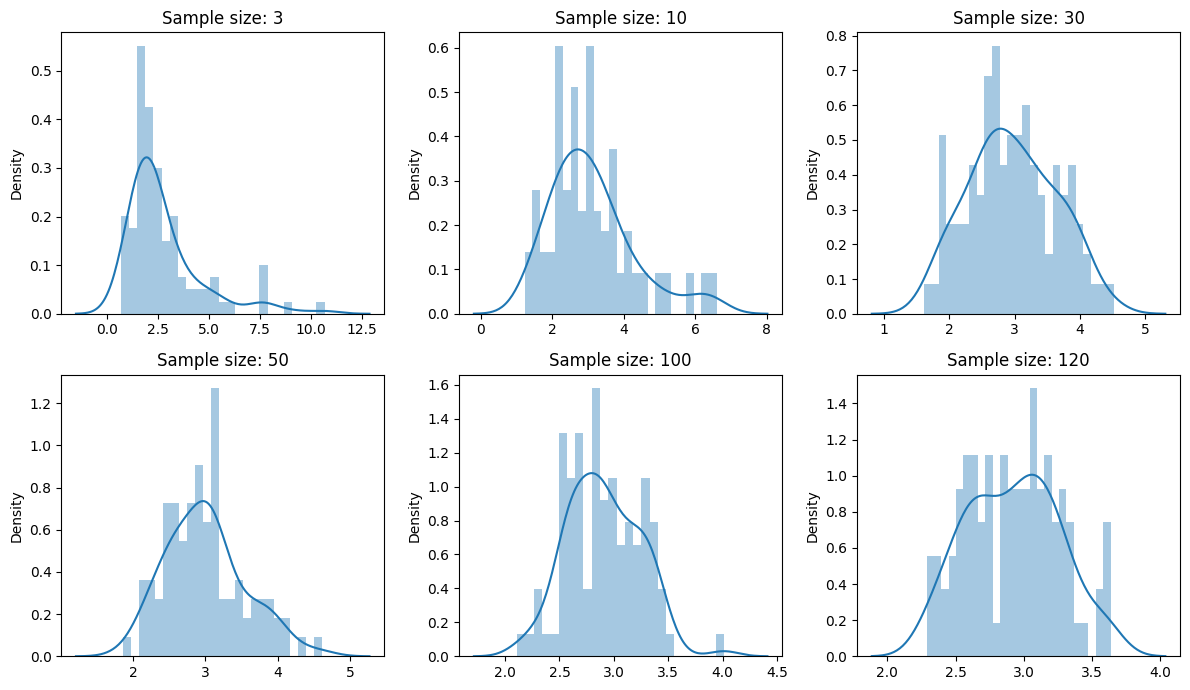

In [104]:
sample_size = [3,10,30,50,100,120]
plt.figure(figsize=(12,7))
for i, sampl_size in enumerate(sample_size):
    sam_mean = [df[(df['trip_distance']<30) & (df['trip_distance']>0.1)]['trip_distance'].sample(sampl_size).mean() for i in range(100)]
    plt.subplot(2,3,i+1)
    sns.distplot(sam_mean, bins=25)
    plt.title("Sample size: "+str(sampl_size))
plt.tight_layout()
plt.show()

##### As we can observe, the distribution graph for Sample Size 3 & 10 does not resemble Normal Distribution. Still, from the Sample Size 30 as the Sample Size increases, the Sample Distribution resembles Normal Distribution.
##### The mean commute time of 30000 employees (μ)= 36.6 (sample mean) + some margin of error. We can find this margin of error using the CLT (central limit theorem).
##### Let’s say we have the mean of 1000 trip sample is X¯=2.905510333333333 miles, and the Standard Deviation of the sample is S=0.6561064103765346 miles. Using CLT, we can infer that,
##### Sampling Distribution Mean(μₓ¯) = Population Mean(μ)
##### Sampling Distributions’ Standard Deviation = σ/√n ≈S/√n = 10/√1000 
##### Since Sampling Distribution is a Normal Distribution
##### P(μ-2 < 2.90 < μ+2) = 95.4%, we get this value by 1–2–3 Rule of Normal Distribution Curve.
##### P(μ-2 < 2.90 < μ+2) = P(2.90–2< μ < 2.90+2) = 95.4%
##### Now, we can say that there is a 95.4% probability that the Population Mean(μ) lies between (2.90–2, 2.90+2). In other words, we are 95.4% confident that the error in estimating the mean ≤ 2.

### Box-Cox Transform
##### The Box-Cox transform is a technique used to transform non-normal data into a normal or nearly normal distribution. The Box-Cox transform is a family of power transforms that can be used to stabilize the variances of data and to make the data more normal.

##### The Box-Cox transform is defined as:

### $$y = \frac{\left(x^{\lambda }-1\right)}{\lambda } \ \ for \ \   {\lambda } ≠ 0$$
### $$y = log(x) \ \ for \ \ {\lambda } = 0$$

##### Where x is the original data, y is the transformed data, and λ is the transformation parameter. The value of λ can be determined using maximum likelihood estimation.

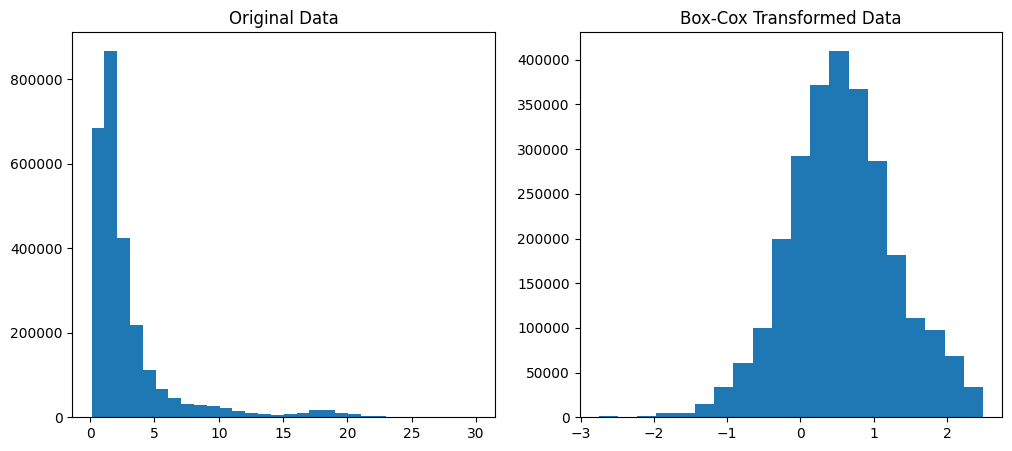

In [126]:
plt.figure(figsize=(12,5))
# Generate some non-normal data
data = df[(df['trip_distance']<30) & (df['trip_distance']>0.1)]['trip_distance']

# Apply the Box-Cox transform
transformed_data, lambda_ = boxcox(data)

# Plot the original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30)
plt.title('Original Data')

# Plot the transformed data
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=20)
plt.title('Box-Cox Transformed Data')

plt.show()
